<h1>An analysis of coronavirus in China<h1>

<p><b>Jiadi Huang</b></p>
<br>
<p><b>Netid:jh2649</b></p>

<h3> An analysis of the current outbreak of the coronavirus happening in China using the data from https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset/data. The data is retrieved from 03/11/2019</h3>

<h3>Background</h3>

<p>Coronaviruses are a large family of viruses that are common in people and many different species of animals, including camels, cattle, cats, and bats. Rarely, animal coronaviruses can infect people and then spread between people such as with MERS-CoV, SARS-CoV, and now with this new virus.</p>
<p>The coronavirus was first detected in China. On January 30, 2020, the International Health Regulations Emergency Committee of the World Health Organization (WHO) declared the outbreak a “public health emergency of international concernexternal icon” (PHEIC). On January 31, Health and Human Services Secretary Alex M. Azar II declared a public health emergency (PHE) for the United States to aid the nation’s healthcare community in responding to COVID-19. On March 11, WHO publiclyexternal icon characterized COVID-19 as a pandemic. On March 13, the President of the United States declared the COVID-19 outbreak a national emergency (information retrieved from CDC https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/summary.html)</p>

<h3>Question</h3>

<p>Does a higher avilability of medical resources result in a lower death rate caused by the coronavirus?</p>

<h3>Hypothesis</h3>

<p>My hypothesis is that the amount of resources that is avilable to treat coronavirus has a significant impact on the deathrate caused by the coronavirus.</p>

<h3>The Study</h3>

<p>I will be comparing the death rate and the percent of people infected in different provinces of China to study the problem. I am using the percent of people infected to show the resources avilable in different provinces because the more percentage of people infected means less medical resources is avilable for treatment.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
df=pd.read_csv('covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


<h3>Extracting Data from 3/11 in Mainland China</h3>

In [3]:
data311china = df.loc[(df['ObservationDate'] == '03/11/20') & (df['Country/Region'] == 'Mainland China')]
data311china.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4719,4720,03/11/20,Hubei,Mainland China,2020-03-11T10:53:02,67773,3046,49134
4726,4727,03/11/20,Guangdong,Mainland China,2020-03-11T10:13:06,1356,8,1282
4727,4728,03/11/20,Henan,Mainland China,2020-03-11T08:13:09,1273,22,1249
4728,4729,03/11/20,Zhejiang,Mainland China,2020-03-11T09:33:12,1215,1,1195
4729,4730,03/11/20,Hunan,Mainland China,2020-03-11T02:18:14,1018,4,995


In [4]:
data311china.size

280

In [5]:
280/8

35.0

<h3>A total of 35 Provinces reporting data in China</h3>

In [6]:
a = data311china['Confirmed']

In [7]:
data311chinatop5 = df.loc[(df['ObservationDate'] == '03/11/20') & (df['Country/Region'] == 'Mainland China') & (df['Confirmed'] >= 990) & (df['Confirmed'] <= 1356)]
data311chinatop5

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4726,4727,03/11/20,Guangdong,Mainland China,2020-03-11T10:13:06,1356,8,1282
4727,4728,03/11/20,Henan,Mainland China,2020-03-11T08:13:09,1273,22,1249
4728,4729,03/11/20,Zhejiang,Mainland China,2020-03-11T09:33:12,1215,1,1195
4729,4730,03/11/20,Hunan,Mainland China,2020-03-11T02:18:14,1018,4,995
4730,4731,03/11/20,Anhui,Mainland China,2020-03-11T02:18:14,990,6,984


<h3>A plot showing the 5 provinces with the greatest numbers of cases of coronaviruses except for Hubei(epicenter of the coronavirus which has coronavirus cases way more than the other provinces.</h3>

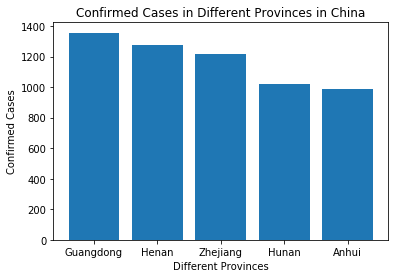

In [8]:
bar1 = (data311chinatop5['Confirmed'][4726])
bar2 = (data311chinatop5['Confirmed'][4727])
bar3 = (data311chinatop5['Confirmed'][4728])
bar4 = (data311chinatop5['Confirmed'][4729])
bar5 = (data311chinatop5['Confirmed'][4730])

plt.bar([0,1,2,3,4],[bar1,bar2,bar3,bar4,bar5],align='center')

plt.title('Confirmed Cases in Different Provinces in China')

plt.xticks([0,1,2,3,4],['Guangdong','Henan','Zhejiang','Hunan','Anhui'])
plt.ylabel('Confirmed Cases')
plt.xlabel('Different Provinces')
plt.show()

<h3> adding a total population column, removing duplicate row, removing provinces with 0 infected cases </h3>

In [9]:
data311china['Total Population'] = 0
data311china.loc[4719,'Total Population'] = 58000000
data311china.loc[4726,'Total Population'] = 113460000
data311china.loc[4727,'Total Population'] = 94000000
data311china.loc[4728,'Total Population'] = 57370000
data311china.loc[4729,'Total Population'] = 67370000
data311china.loc[4730,'Total Population'] = 62000000
data311china.loc[4731,'Total Population'] = 45200000
data311china.loc[4732,'Total Population'] = 92480000
data311china.loc[4736,'Total Population'] = 80400000
data311china.loc[4738,'Total Population'] = 30480000
data311china.loc[4739,'Total Population'] = 81100000
data311china.loc[4742,'Total Population'] = 38310000
data311china.loc[4745,'Total Population'] = 21540000
data311china.loc[4747,'Total Population'] = 24240000
data311china.loc[4748,'Total Population'] = 74700000
data311china.loc[4750,'Total Population'] = 47500000
data311china.loc[4752,'Total Population'] = 48380000
data311china.loc[4754,'Total Population'] = 37330000
data311china.loc[4759,'Total Population'] = 45970000
data311china.loc[4760,'Total Population'] = 9258000
data311china.loc[4762,'Total Population'] = 34750000
data311china.loc[4763,'Total Population'] = 11558000
data311china.loc[4764,'Total Population'] = 36500000
data311china.loc[4765,'Total Population'] = 25580000
data311china.loc[4766,'Total Population'] = 7392000
data311china.loc[4767,'Total Population'] = 43900000
data311china.loc[4771,'Total Population'] = 27460000
data311china.loc[4774,'Total Population'] = 21810000
data311china.loc[4775,'Total Population'] = 24710000
data311china.loc[4776,'Total Population'] = 5620000
data311china.loc[4819,'Total Population'] = 5627000
data311china.loc[4834,'Total Population'] = 622567
data311china.loc[4902,'Total Population'] = 13500000
data311china.loc[4925,'Total Population'] = 25580000

data311china = data311china.drop([4925,4926])





/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<h3> Adding a death rate column </h3>

In [10]:
data311china['deathRate']=data311china["Deaths"]/data311china['Confirmed']
data311china['percentInfected']=data311china["Confirmed"]/data311china['Total Population']
data311china

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Total Population,deathRate,percentInfected
4719,4720,03/11/20,Hubei,Mainland China,2020-03-11T10:53:02,67773,3046,49134,58000000,0.044944,1.168500e-03
4726,4727,03/11/20,Guangdong,Mainland China,2020-03-11T10:13:06,1356,8,1282,113460000,0.005900,1.195135e-05
4727,4728,03/11/20,Henan,Mainland China,2020-03-11T08:13:09,1273,22,1249,94000000,0.017282,1.354255e-05
4728,4729,03/11/20,Zhejiang,Mainland China,2020-03-11T09:33:12,1215,1,1195,57370000,0.000823,2.117832e-05
4729,4730,03/11/20,Hunan,Mainland China,2020-03-11T02:18:14,1018,4,995,67370000,0.003929,1.511058e-05
4730,4731,03/11/20,Anhui,Mainland China,2020-03-11T02:18:14,990,6,984,62000000,0.006061,1.596774e-05
4731,4732,03/11/20,Jiangxi,Mainland China,2020-03-11T02:18:14,935,1,932,45200000,0.001070,2.068584e-05
4732,4733,03/11/20,Shandong,Mainland China,2020-03-11T11:33:07,760,6,726,92480000,0.007895,8.217993e-06
4736,4737,03/11/20,Jiangsu,Mainland China,2020-03-11T02:18:14,631,0,627,80400000,0.000000,7.848259e-06
4738,4739,03/11/20,Chongqing,Mainland China,2020-03-11T23:13:05,576,6,554,30480000,0.010417,1.889764e-05


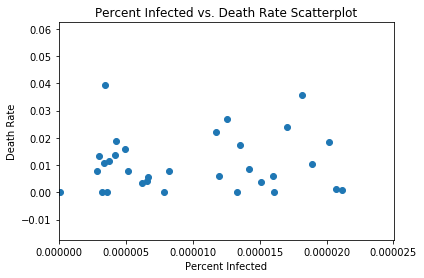

In [11]:
plt.scatter(data311china['percentInfected'],data311china['deathRate'])

ax = plt.gca()
ax.set_xlim([0,0.000025])

plt.title('Percent Infected vs. Death Rate Scatterplot')

plt.ylabel('Death Rate')
plt.xlabel('Percent Infected')

plt.show()

In [12]:
results = smf.ols('deathRate ~ percentInfected',data = data311china).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              deathRate   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     10.63
Date:                Wed, 18 Mar 2020   Prob (F-statistic):            0.00270
Time:                        02:08:45   Log-Likelihood:                 104.94
No. Observations:                  33   AIC:                            -205.9
Df Residuals:                      31   BIC:                            -202.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0104      0.002      5.596      0.000       0.007       0.014
percentInfected    29.6625      9.096      3.261      0.003      11.111      48.214
==============================================================================
Omnibus:                        9.535   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                8.284
Skew:                           1.145   Prob(JB):                       0.0159
Kurtosis:                       3.886   Cond. No.                     5.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Analysis and Conclusion</h3>

<p>the percent infected variable has a p-value of 0.003, so this model is signficant if alpha less than 0.05. the r^2 value is 0.255 which means 25.5% of the variance in the deathRate caused by coronavirus is explained by the percent of the people infected by coronavirus in a given province. The given information shows that the percent infected has a great impact on the death rate caused by coronavirus. The data supports my claim that the amount of resources that is avilable to treat coronavirus has a significant impact on the deathrate caused by the coronavirus. More medical resources for treating the coronavirus will result in a lower death rate.</p>